In [1]:
import numpy as np
import pandas as pd

# Object creation

## pd.Series

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## pd.date_range

In [3]:
dates = pd.date_range("20130101",periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

## pd.DataFrame
- np.random.randint(m,n): m부터 n-1 중 랜덤 숫자 1개 뽑아내기
- np.random.rand(m,n): 0부터 1사이의 균일분포에서 난수 matrix(m,n) 생성
- np.random.randn(m,n): 표준정규분포에서 난수 matrix(m,n) 생성

In [4]:
df = pd.DataFrame(np.random.randn(6,4),index = dates,columns = list("ABCD"))
df

,A,B,C,D
2013-01-01,0.239239,-2.289081,-0.479197,1.294377
2013-01-02,-0.098158,1.021500,-0.265304,0.823418
2013-01-03,-0.385883,0.664073,0.205501,-1.657852
2013-01-04,-1.082484,-0.345128,-0.736700,-1.800699
2013-01-05,-1.744088,1.125421,-2.190689,-2.193461
2013-01-06,1.111704,-1.228015,-0.263035,0.599550


- Timestamp()함수를 사용해 특정 날짜를 표현할 수 있다.

In [5]:
df2 = pd.DataFrame(
    {
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1,index=list(range(4)),dtype="float32"),
    "D": np.array([3]*4,dtype="int32"),
    "E": pd.Categorical(["test","train","test","train"]),
    "F": "foo"
}
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


- 각각의 열들의 dtype를 알 수 있음

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

df2.TAB을 누르면 사용할 수 있는 열들이 자동으로 나타남

# Viewing data

## df.head & df.tail

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.239239,-2.289081,-0.479197,1.294377
2013-01-02,-0.098158,1.021500,-0.265304,0.823418
2013-01-03,-0.385883,0.664073,0.205501,-1.657852
2013-01-04,-1.082484,-0.345128,-0.736700,-1.800699
2013-01-05,-1.744088,1.125421,-2.190689,-2.193461


In [8]:
# 구체적으로 몇개를 출력할 것인지 설정 가능
df.tail(3)

,A,B,C,D
2013-01-04,-1.082484,-0.345128,-0.736700,-1.800699
2013-01-05,-1.744088,1.125421,-2.190689,-2.193461
2013-01-06,1.111704,-1.228015,-0.263035,0.599550


## df.index & df.columns
- df.index : 행 이름
- df.columns: 열 이름

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

## df.to_numpy()
- 데이터를 NumPy 방식으로 표현하도록 함
- DataFrame이 서로 다른 자료형을 갖고 있다면, NumPy와 pandas의 근본적인 차이로 인해 비용이 많이 드는 작업임.
- NumPy 어레이는 전체 어레이에 대해 하나의 자료형 (dtype)을 가지지만, pandas의 DataFrame은 열마다 하나의 자료형을 가짐.
- to_numpy()를 호출하면, pandas는 DataFrame의 자료형을 모두 담을 수 있는 NumPy 자료형을 찾습니다.

- 모두 부동소수점 값을 갖는 df에 대해, to_numpy()은 빠르며 데이터를 복사할 필요가 없음.

In [11]:
df.to_numpy()

array([[ 0.23923908, -2.28908085, -0.47919674,  1.29437718],
       [-0.09815834,  1.02150044, -0.26530377,  0.82341811],
       [-0.38588283,  0.66407272,  0.20550119, -1.65785159],
       [-1.0824843 , -0.34512849, -0.73669981, -1.80069927],
       [-1.74408814,  1.12542143, -2.19068937, -2.1934608 ],
       [ 1.11170376, -1.22801489, -0.26303543,  0.5995504 ]])

- 다양한 dtype을 갖는 df2의 경우, to_numpy()는 상대적으로 비용이 많이 듦

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

- *.to_numpy()는 출력값에 index나 column 값이 포함되어 있지 않다*

## df.describe()
- quick statistic summary of your data

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.326612,-0.175205,-0.621571,-0.489111
std,1.002519,1.373599,0.828876,1.554334
min,-1.744088,-2.289081,-2.190689,-2.193461
25%,-0.908334,-1.007293,-0.672324,-1.764987
50%,-0.242021,0.159472,-0.372250,-0.529151
75%,0.154890,0.932144,-0.263603,0.767451
max,1.111704,1.125421,0.205501,1.294377


## df.T
- transpose

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.239239,-0.098158,-0.385883,-1.082484,-1.744088,1.111704
B,-2.289081,1.021500,0.664073,-0.345128,1.125421,-1.228015
C,-0.479197,-0.265304,0.205501,-0.736700,-2.190689,-0.263035
D,1.294377,0.823418,-1.657852,-1.800699,-2.193461,0.599550


## df.sort_index()
- 데이터 정렬
- 데이터를 index 기준으로 정렬
- 기본 정렬 방식 오름차순(ascending)
- 내림차순으로 정렬하고 싶으면 ascending=F

In [15]:
# axis = 1 이므로 열 index를 기준으로 정렬
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2013-01-01,1.294377,-0.479197,-2.289081,0.239239
2013-01-02,0.823418,-0.265304,1.021500,-0.098158
2013-01-03,-1.657852,0.205501,0.664073,-0.385883
2013-01-04,-1.800699,-0.736700,-0.345128,-1.082484
2013-01-05,-2.193461,-2.190689,1.125421,-1.744088
2013-01-06,0.599550,-0.263035,-1.228015,1.111704


## df.sort_values()
- 어떤 컬럼의 값을 기준으로 정렬해야 하는지 명시적으로 설정해야하기 때문에, **by 옵션에 정렬 기준이되는 컬럼명**을 집어넣어야 함

In [16]:
# B열에서 value값들이 오름차순이 되도록 정렬
df.sort_values(by="B")

,A,B,C,D
2013-01-01,0.239239,-2.289081,-0.479197,1.294377
2013-01-06,1.111704,-1.228015,-0.263035,0.599550
2013-01-04,-1.082484,-0.345128,-0.736700,-1.800699
2013-01-03,-0.385883,0.664073,0.205501,-1.657852
2013-01-02,-0.098158,1.021500,-0.265304,0.823418
2013-01-05,-1.744088,1.125421,-2.190689,-2.193461


# Selection
- .at
- .iat
- .iloc
- .loc 

## Getting

In [17]:
df["A"] #열이름 추출

2013-01-01    0.239239
2013-01-02   -0.098158
2013-01-03   -0.385883
2013-01-04   -1.082484
2013-01-05   -1.744088
2013-01-06    1.111704
Freq: D, Name: A, dtype: float64

In [18]:
df[0:3] #행기준 추출

,A,B,C,D
2013-01-01,0.239239,-2.289081,-0.479197,1.294377
2013-01-02,-0.098158,1.021500,-0.265304,0.823418
2013-01-03,-0.385883,0.664073,0.205501,-1.657852


In [19]:
# 양 끝 값이 모두 포함되어 있음
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.098158,1.021500,-0.265304,0.823418
2013-01-03,-0.385883,0.664073,0.205501,-1.657852
2013-01-04,-1.082484,-0.345128,-0.736700,-1.800699


## Selection by label
- iloc : '인덱스번호'
- loc: '변수명'

### df.loc()

In [20]:
df.loc[dates[0]]

A    0.239239
B   -2.289081
C   -0.479197
D    1.294377
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
df.loc[:,["A","B"]]

,A,B
2013-01-01,0.239239,-2.289081
2013-01-02,-0.098158,1.021500
2013-01-03,-0.385883,0.664073
2013-01-04,-1.082484,-0.345128
2013-01-05,-1.744088,1.125421
2013-01-06,1.111704,-1.228015


In [22]:
# 행&열을 둘 다 고려해서 출력 가능
# 양 끝 값도 포함
df.loc["20130102":"20130104",["A","B"]]

,A,B
2013-01-02,-0.098158,1.021500
2013-01-03,-0.385883,0.664073
2013-01-04,-1.082484,-0.345128


In [23]:
df.loc["20130102",["A","B"]]

A   -0.098158
B    1.021500
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
df.loc[dates[0],"A"]

0.23923907772344352

In [25]:
df.at[dates[0],"A"]

0.23923907772344352

## Selection by position
- iloc : '인덱스번호'
- loc: '변수명'

### df.iloc()

In [26]:
df.iloc[3]

A   -1.082484
B   -0.345128
C   -0.736700
D   -1.800699
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
# 행&열 둘 다 고려 가능
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.082484,-0.345128
2013-01-05,-1.744088,1.125421


In [28]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.098158,-0.265304
2013-01-03,-0.385883,0.205501
2013-01-05,-1.744088,-2.190689


In [29]:
# : 이렇게만 표시하면 모든 열 출력하겠다는 뜻
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.098158,1.021500,-0.265304,0.823418
2013-01-03,-0.385883,0.664073,0.205501,-1.657852


In [30]:
# : 이렇게만 표시하면 모든 행 출력하겠다는 뜻
df.iloc[:,1:3]

,B,C
2013-01-01,-2.289081,-0.479197
2013-01-02,1.021500,-0.265304
2013-01-03,0.664073,0.205501
2013-01-04,-0.345128,-0.736700
2013-01-05,1.125421,-2.190689
2013-01-06,-1.228015,-0.263035


In [31]:
#scalar 값도 출력 가능
df.iloc[1,1]

1.0215004384998603

## Boolean indexing

In [32]:
df[df["A"]>0]

,A,B,C,D
2013-01-01,0.239239,-2.289081,-0.479197,1.294377
2013-01-06,1.111704,-1.228015,-0.263035,0.599550


In [33]:
# 조건을 만족하는 값만 출력 나머지는 NaN
df[df > 0]

,A,B,C,D
2013-01-01,0.239239,NaN,NaN,1.294377
2013-01-02,NaN,1.021500,NaN,0.823418
2013-01-03,NaN,0.664073,0.205501,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,1.125421,NaN,NaN
2013-01-06,1.111704,NaN,NaN,0.599550


### df.copy()

In [34]:
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,0.239239,-2.289081,-0.479197,1.294377
2013-01-02,-0.098158,1.021500,-0.265304,0.823418
2013-01-03,-0.385883,0.664073,0.205501,-1.657852
2013-01-04,-1.082484,-0.345128,-0.736700,-1.800699
2013-01-05,-1.744088,1.125421,-2.190689,-2.193461
2013-01-06,1.111704,-1.228015,-0.263035,0.599550


In [35]:
# 열 추가
df2["E"]=["one","one","two","three","four","three"]
df2

,A,B,C,D,E
2013-01-01,0.239239,-2.289081,-0.479197,1.294377,one
2013-01-02,-0.098158,1.021500,-0.265304,0.823418,one
2013-01-03,-0.385883,0.664073,0.205501,-1.657852,two
2013-01-04,-1.082484,-0.345128,-0.736700,-1.800699,three
2013-01-05,-1.744088,1.125421,-2.190689,-2.193461,four
2013-01-06,1.111704,-1.228015,-0.263035,0.599550,three


## Setting

In [36]:
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range("20130102",periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
# 인덱스 이름에 맞춰서 넣기 때문에 20130101에는 NaN이라고 뜰 것
df["F"] = s1

In [38]:
df

,A,B,C,D,F
2013-01-01,0.239239,-2.289081,-0.479197,1.294377,NaN
2013-01-02,-0.098158,1.021500,-0.265304,0.823418,1.0
2013-01-03,-0.385883,0.664073,0.205501,-1.657852,2.0
2013-01-04,-1.082484,-0.345128,-0.736700,-1.800699,3.0
2013-01-05,-1.744088,1.125421,-2.190689,-2.193461,4.0
2013-01-06,1.111704,-1.228015,-0.263035,0.599550,5.0


### df.at()
- .loc과 동일하게 label기반으로 데이터 접근

In [39]:
# 20130101 행의 A열의 값을 0 으로 
df.at[dates[0],"A"] = 0

### df.iat()
- iloc과 동일하게 position기반으로 데이터 접근

In [40]:
# 20130101 행의 B열의 값을 0 으로 
df.iat[0,1] = 0

In [41]:
# "D" 열의 모든 값들을 5로 
df.loc[:,"D"] = np.array([5]*len(df))

In [42]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479197,5,NaN
2013-01-02,-0.098158,1.021500,-0.265304,5,1.0
2013-01-03,-0.385883,0.664073,0.205501,5,2.0
2013-01-04,-1.082484,-0.345128,-0.736700,5,3.0
2013-01-05,-1.744088,1.125421,-2.190689,5,4.0
2013-01-06,1.111704,-1.228015,-0.263035,5,5.0


In [43]:
df2 = df.copy()
df2[df2>0] = -df2 #value값이 0보다 크면 음수로 바꾸기
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479197,-5,NaN
2013-01-02,-0.098158,-1.021500,-0.265304,-5,-1.0
2013-01-03,-0.385883,-0.664073,-0.205501,-5,-2.0
2013-01-04,-1.082484,-0.345128,-0.736700,-5,-3.0
2013-01-05,-1.744088,-1.125421,-2.190689,-5,-4.0
2013-01-06,-1.111704,-1.228015,-0.263035,-5,-5.0


# Missing data

## df.reindex()

In [44]:
df1 = df.reindex(index=dates[0:4],columns=list(df.columns)+["E"])
# 20130101 & 20130102의 E열 값을 1로 만들기
# 지정해주지 않은 값은 NaN으로 표시 됨
df1.loc[dates[0]:dates[1],"E"]=1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.479197,5,NaN,1.0
2013-01-02,-0.098158,1.021500,-0.265304,5,1.0,1.0
2013-01-03,-0.385883,0.664073,0.205501,5,2.0,NaN
2013-01-04,-1.082484,-0.345128,-0.736700,5,3.0,NaN


## df.dropna()
- 결측값이 있으면 제거
- (axis = ), default 0
- 0이면 행 제거 1이면 열 제거
- (how = ), default any
- any이면 임의의 NaN값 있어도 제거, all이면 모두 NaN값일 때 제거

In [45]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.479197,5,NaN,1.0
2013-01-02,-0.098158,1.021500,-0.265304,5,1.0,1.0
2013-01-03,-0.385883,0.664073,0.205501,5,2.0,NaN
2013-01-04,-1.082484,-0.345128,-0.736700,5,3.0,NaN


In [46]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.098158,1.0215,-0.265304,5,1.0,1.0


## df.fillna()
- 결측값 채우기

In [47]:
# 결측값을 모두 5로 채웠음
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.479197,5,5.0,1.0
2013-01-02,-0.098158,1.021500,-0.265304,5,1.0,1.0
2013-01-03,-0.385883,0.664073,0.205501,5,2.0,5.0
2013-01-04,-1.082484,-0.345128,-0.736700,5,3.0,5.0


## pd.isna()
- 결측값인지 아닌지 반환해줌
- 결측값이면 True 아니면 False

In [48]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

## Stats

### df.mean()

In [49]:
# 열 기준으로 평균
df.mean()

A   -0.366485
B    0.206309
C   -0.621571
D    5.000000
F    3.000000
dtype: float64

In [50]:
# 행 기준으로 평균
df.mean(1)

2013-01-01    1.130201
2013-01-02    1.331608
2013-01-03    1.496738
2013-01-04    1.167137
2013-01-05    1.238129
2013-01-06    1.924131
Freq: D, dtype: float64

### .shift()

In [51]:
# 아래로 두칸 이동하는 것
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

### df.sub()
- 뺄셈

In [52]:
# NaN과 연산을 하면 NaN이 나오겠지
df.sub(s,axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.385883,-0.335927,-0.794499,4.0,1.0
2013-01-04,-4.082484,-3.345128,-3.736700,2.0,0.0
2013-01-05,-6.744088,-3.874579,-7.190689,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply
- 행 or 열 또는 전체 셀에 원하는 연산 지원

### df.apply(np.cumsum)
- 누적합

In [53]:
# 열 기준으로 누적합
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.479197,5,NaN
2013-01-02,-0.098158,1.021500,-0.744501,10,1.0
2013-01-03,-0.484041,1.685573,-0.538999,15,3.0
2013-01-04,-1.566525,1.340445,-1.275699,20,6.0
2013-01-05,-3.310614,2.465866,-3.466389,25,10.0
2013-01-06,-2.198910,1.237851,-3.729424,30,15.0


In [54]:
# 열 기준으로 최댓값-최솟값
df.apply(lambda x:x.max()-x.min())

A    2.855792
B    2.353436
C    2.396191
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [55]:
s = pd.Series(np.random.randint(0,7,size=10))
s

0    3
1    0
2    6
3    3
4    2
5    0
6    5
7    3
8    5
9    6
dtype: int32

### s.value_counts()
- 각각의 value값이 몇번 나왔는지

In [56]:
s.value_counts()

3    3
0    2
6    2
5    2
2    1
dtype: int64

## String Methods

In [57]:
s = pd.Series(["A","B","C","Aaba","Baca",np.nan,"CABA","dog","cat"])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

### s.str.lower()
- 모든 대문자를 소문자로 바꾸기

In [58]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### s.str.upper()
- 모든 소문자를 대문자로 바꾸기

In [59]:
s.str.upper()

0       A
1       B
2       C
3    AABA
4    BACA
5     NaN
6    CABA
7     DOG
8     CAT
dtype: object

# Merge

## Concat

In [60]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.458043,-1.112928,-0.332194,1.061534
1,1.151654,2.213389,0.188364,-1.670047
2,-2.823504,-0.202118,0.287844,-0.775945
3,0.394214,2.270779,-0.118810,0.481662
4,-1.277238,-1.326654,0.426490,-1.199694
5,0.985969,0.342736,-0.738796,-0.020804
6,0.478118,-0.235912,-0.505060,0.975634
7,0.655797,-1.174432,0.205545,0.944009
8,0.288554,-0.373041,-0.666889,0.123902
9,1.332670,1.131615,0.184444,0.402897


In [61]:
# break it into pieces
pieces = [df[:3],df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.458043 -1.112928 -0.332194  1.061534
 1  1.151654  2.213389  0.188364 -1.670047
 2 -2.823504 -0.202118  0.287844 -0.775945,
           0         1         2         3
 3  0.394214  2.270779 -0.118810  0.481662
 4 -1.277238 -1.326654  0.426490 -1.199694
 5  0.985969  0.342736 -0.738796 -0.020804
 6  0.478118 -0.235912 -0.505060  0.975634,
           0         1         2         3
 7  0.655797 -1.174432  0.205545  0.944009
 8  0.288554 -0.373041 -0.666889  0.123902
 9  1.332670  1.131615  0.184444  0.402897]

### pd.concat()
- 단순히 두 데이터 프레임을 합칠 때

In [62]:
pd.concat(pieces)

,0,1,2,3
0,-0.458043,-1.112928,-0.332194,1.061534
1,1.151654,2.213389,0.188364,-1.670047
2,-2.823504,-0.202118,0.287844,-0.775945
3,0.394214,2.270779,-0.118810,0.481662
4,-1.277238,-1.326654,0.426490,-1.199694
5,0.985969,0.342736,-0.738796,-0.020804
6,0.478118,-0.235912,-0.505060,0.975634
7,0.655797,-1.174432,0.205545,0.944009
8,0.288554,-0.373041,-0.666889,0.123902
9,1.332670,1.131615,0.184444,0.402897


## Join

In [63]:
left = pd.DataFrame({"key":["foo","foo"],
                     "lval": [1,2]})
right = pd.DataFrame({"key":["foo","foo"],
                      "rval": [4,5]})

In [64]:
left

,key,lval
0,foo,1
1,foo,2


In [65]:
right

,key,rval
0,foo,4
1,foo,5


### pd.merge()
- 두 데이터 프레임을 공통된 항목을 기준으로 합치기

In [66]:
pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [67]:
pd.concat([left,right])

,key,lval,rval
0,foo,1.0,NaN
1,foo,2.0,NaN
0,foo,NaN,4.0
1,foo,NaN,5.0


In [68]:
left = pd.DataFrame({"key":["foo","bar"],
                     "lval": [1,2]})
right = pd.DataFrame({"key":["foo","bar"],
                      "rval":[4,5]})

In [69]:
left

,key,lval
0,foo,1
1,bar,2


In [70]:
right

,key,rval
0,foo,4
1,bar,5


In [71]:
pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [72]:
pd.concat([left,right])

,key,lval,rval
0,foo,1.0,NaN
1,bar,2.0,NaN
0,foo,NaN,4.0
1,bar,NaN,5.0


# Grouping

In [73]:
df = pd.DataFrame(
{
    "A":["foo","bar","foo","bar","foo","bar","foo","foo"],
    "B":["one","one","two","three","two","two","one","three"],
    "C":np.random.randn(8),
    "D":np.random.randn(8),
})
df

,A,B,C,D
0,foo,one,-0.607007,-1.876610
1,bar,one,-0.504877,-1.311924
2,foo,two,0.657139,-0.170447
3,bar,three,0.352710,0.998965
4,foo,two,-0.568095,-0.189351
5,bar,two,-0.416956,0.193910
6,foo,one,-0.903355,1.106970
7,foo,three,1.281616,-0.903840


## df.groupby()

In [74]:
df.groupby("A").sum()

,C,D
A,,
bar,-0.569123,-0.119049
foo,-0.139701,-2.033278


In [75]:
df.groupby(["A","B"]).sum()

C         D
A   B                        
bar one   -0.504877 -1.311924
    three  0.352710  0.998965
    two   -0.416956  0.193910
foo one   -1.510362 -0.769640
    three  1.281616 -0.903840
    two    0.089044 -0.359798

# Reshaping

## Stack

### zip

In [76]:
tuples = list(
zip(
*[
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"]    
]
)
)
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

### pd.MultiIndex.from_tuples

In [77]:
index = pd.MultiIndex.from_tuples(tuples,names=["first","second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [78]:
df = pd.DataFrame(np.random.randn(8,2),index=index,columns=["A","B"])
df

A         B
first second                    
bar   one     0.525386 -0.811414
      two     0.266064  1.434790
baz   one    -0.235749 -0.024552
      two    -0.956512  0.263664
foo   one    -1.005276 -0.188435
      two     0.246184 -0.388245
qux   one    -0.023578  0.300267
      two     1.587091 -0.240209

In [79]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.525386 -0.811414
      two     0.266064  1.434790
baz   one    -0.235749 -0.024552
      two    -0.956512  0.263664

### df.stack()
- 데이터 재구조화
- 세로로 길게 쌓음

In [80]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.525386
               B   -0.811414
       two     A    0.266064
               B    1.434790
baz    one     A   -0.235749
               B   -0.024552
       two     A   -0.956512
               B    0.263664
dtype: float64

### df.unstack()
- 데이터 재구조화
- 가로로 길게 쌓음

In [81]:
stacked.unstack()

A         B
first second                    
bar   one     0.525386 -0.811414
      two     0.266064  1.434790
baz   one    -0.235749 -0.024552
      two    -0.956512  0.263664

In [82]:
# second와 열 (A,B) 위치 바꿈
stacked.unstack(1)

second        one       two
first                      
bar   A  0.525386  0.266064
      B -0.811414  1.434790
baz   A -0.235749 -0.956512
      B -0.024552  0.263664

In [83]:
# first와 열 (A,B) 위치 바꿈
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.525386 -0.235749
       B -0.811414 -0.024552
two    A  0.266064 -0.956512
       B  1.434790  0.263664

## Pivot tables

In [84]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,0.325667,0.832136
1,one,B,foo,0.191329,-1.403532
2,two,C,foo,-0.937195,1.815239
3,three,A,bar,-0.649258,2.223741
4,one,B,bar,0.440795,-0.628871
5,one,C,bar,-0.015687,0.468109
6,two,A,foo,0.574439,1.035889
7,three,B,foo,-0.652281,0.861983
8,one,C,foo,0.265583,-0.686613
9,one,A,bar,1.533905,1.717450


### pd.pivot_table()

In [85]:
pd.pivot_table(df,values="D",index=["A","B"],columns=["C"])

C             bar       foo
A     B                    
one   A  1.533905  0.325667
      B  0.440795  0.191329
      C -0.015687  0.265583
three A -0.649258       NaN
      B       NaN -0.652281
      C  0.143508       NaN
two   A       NaN  0.574439
      B  0.014506       NaN
      C       NaN -0.937195

# Time Series

In [86]:
# freq="S"이라는건 초 단위로 만들겠다는 뜻
rng = pd.date_range("1/1/2012",periods=100,freq="S")

In [87]:
ts = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
ts

2012-01-01 00:00:00    275
2012-01-01 00:00:01     53
2012-01-01 00:00:02     78
2012-01-01 00:00:03    163
2012-01-01 00:00:04    384
                      ... 
2012-01-01 00:01:35    484
2012-01-01 00:01:36    231
2012-01-01 00:01:37    468
2012-01-01 00:01:38    203
2012-01-01 00:01:39    320
Freq: S, Length: 100, dtype: int32

## .resample()
- 시계열 데이터를 특정 시간 단위 구간별로 집계 요약

In [88]:
# 5분 단위로 값을 합산
ts.resample("5Min").sum()

2012-01-01    24675
Freq: 5T, dtype: int32

In [89]:
# 5초 단위로 값을 합산
ts.resample("5S").sum()

2012-01-01 00:00:00     953
2012-01-01 00:00:05    1586
2012-01-01 00:00:10    1315
2012-01-01 00:00:15    1427
2012-01-01 00:00:20    1324
2012-01-01 00:00:25    1174
2012-01-01 00:00:30    1179
2012-01-01 00:00:35    1568
2012-01-01 00:00:40     898
2012-01-01 00:00:45    1487
2012-01-01 00:00:50    1197
2012-01-01 00:00:55    1232
2012-01-01 00:01:00     656
2012-01-01 00:01:05    1071
2012-01-01 00:01:10    1319
2012-01-01 00:01:15    1552
2012-01-01 00:01:20    1125
2012-01-01 00:01:25    1147
2012-01-01 00:01:30     759
2012-01-01 00:01:35    1706
Freq: 5S, dtype: int32

In [90]:
# freq = "D" 라는 뜻은 날짜 단위로 하겠다는 뜻
rng = pd.date_range("3/6/2012 00:00",periods=6,freq="D")
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10', '2012-03-11'],
              dtype='datetime64[ns]', freq='D')

In [91]:
ts = pd.Series(np.random.randn(len(rng)),index = rng)
ts

2012-03-06    0.710215
2012-03-07   -1.762716
2012-03-08   -0.409688
2012-03-09    0.764102
2012-03-10   -0.634137
2012-03-11   -0.799084
Freq: D, dtype: float64

## .tz_localize()
- time zone으로 표시

In [92]:
# 입력한 타임존에 맞게 Datetime Array/Index를 지역화
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.710215
2012-03-07 00:00:00+00:00   -1.762716
2012-03-08 00:00:00+00:00   -0.409688
2012-03-09 00:00:00+00:00    0.764102
2012-03-10 00:00:00+00:00   -0.634137
2012-03-11 00:00:00+00:00   -0.799084
Freq: D, dtype: float64

## .tz_convert()
- 다른 time zone으로 바꿀 수 있음

In [93]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.710215
2012-03-06 19:00:00-05:00   -1.762716
2012-03-07 19:00:00-05:00   -0.409688
2012-03-08 19:00:00-05:00    0.764102
2012-03-09 19:00:00-05:00   -0.634137
2012-03-10 19:00:00-05:00   -0.799084
Freq: D, dtype: float64

In [94]:
# freq = "M"이라는 것은 달(month)을 기준으로 하겠다는 뜻
# 분으로 하고 싶을 때는 반드시 Min으로 표시

rng = pd.date_range("1/1/2012",periods=5,freq="M")
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-01-31   -2.505963
2012-02-29    0.160198
2012-03-31   -0.563839
2012-04-30    0.271806
2012-05-31   -0.872263
Freq: M, dtype: float64

## .to_period()
- Datatime Array/Index를 특정 간격을 갖는 PeriodArray/Index로 변환

In [95]:
ps = ts.to_period()
ps

2012-01   -2.505963
2012-02    0.160198
2012-03   -0.563839
2012-04    0.271806
2012-05   -0.872263
Freq: M, dtype: float64

## .to_timestamp()
- DatetimeIndex를 주기의 시작점으로 변환

In [96]:
ps.to_timestamp()

2012-01-01   -2.505963
2012-02-01    0.160198
2012-03-01   -0.563839
2012-04-01    0.271806
2012-05-01   -0.872263
Freq: MS, dtype: float64

- 주기 (period)와 타임스탬프 (timestamp) 간의 변환에 있어서 몇몇 편리한 산술 함수를 사용할 수 있음

In [97]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.head()

1990-03-01 09:00    0.244855
1990-06-01 09:00   -0.030302
1990-09-01 09:00    0.178462
1990-12-01 09:00   -0.806055
1991-03-01 09:00    1.236586
Freq: H, dtype: float64

# Categoricals

In [98]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6],
     "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


- raw grads를 categorical data type로 바꾸기

In [99]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

## .cat.categories()

- 범주를 보다 의미있는 이름으로 변경

In [100]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


- category를 reorder하는 동시에 missing category를 추가

In [101]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

## .sort_values()

- 성적순대로 정렬하기

In [102]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [103]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [104]:
import matplotlib.pyplot as plt
plt.close("all") # 전체 창을 닫기

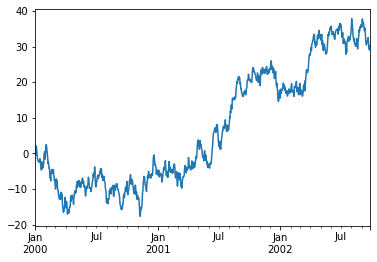

In [105]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot(); #누적합 그래프 그리기

<Figure size 432x288 with 0 Axes>

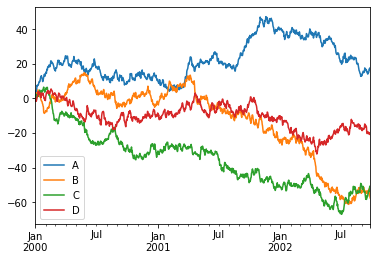

In [106]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best'); #legend의 위치 조정

# Getting data in/out

## CSV

In [107]:
df.to_csv("foo.csv")

In [108]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.999512,-0.815554,1.131895,-0.414334
1,2000-01-02,3.227829,-0.605027,1.553503,-1.632535
2,2000-01-03,4.523003,0.551257,-0.273159,-0.551374
3,2000-01-04,4.397432,2.112336,-0.757176,-1.549556
4,2000-01-05,4.852256,3.229586,0.454741,-0.579040
...,...,...,...,...,...
995,2002-09-22,15.162121,-52.417128,-53.560663,-20.112446
996,2002-09-23,16.853488,-54.064450,-53.834710,-19.813299
997,2002-09-24,16.771748,-55.565006,-51.887725,-20.806400
998,2002-09-25,17.575721,-56.179761,-50.716579,-20.808331


## HDF5

In [110]:
#hdf5 파일로 보내기
df.to_hdf("foo.h5", "df")

In [111]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.999512,-0.815554,1.131895,-0.414334
2000-01-02,3.227829,-0.605027,1.553503,-1.632535
2000-01-03,4.523003,0.551257,-0.273159,-0.551374
2000-01-04,4.397432,2.112336,-0.757176,-1.549556
2000-01-05,4.852256,3.229586,0.454741,-0.579040
...,...,...,...,...
2002-09-22,15.162121,-52.417128,-53.560663,-20.112446
2002-09-23,16.853488,-54.064450,-53.834710,-19.813299
2002-09-24,16.771748,-55.565006,-51.887725,-20.806400
2002-09-25,17.575721,-56.179761,-50.716579,-20.808331


## Excel

In [113]:
#excel 파일로 보내기
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [114]:
#excel 파일로 읽기
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.999512,-0.815554,1.131895,-0.414334
1,2000-01-02,3.227829,-0.605027,1.553503,-1.632535
2,2000-01-03,4.523003,0.551257,-0.273159,-0.551374
3,2000-01-04,4.397432,2.112336,-0.757176,-1.549556
4,2000-01-05,4.852256,3.229586,0.454741,-0.579040
...,...,...,...,...,...
995,2002-09-22,15.162121,-52.417128,-53.560663,-20.112446
996,2002-09-23,16.853488,-54.064450,-53.834710,-19.813299
997,2002-09-24,16.771748,-55.565006,-51.887725,-20.806400
998,2002-09-25,17.575721,-56.179761,-50.716579,-20.808331
